# PROJECT: TMDB Movie Data


## table of Contents
1. Introduction
2. Data wrangling
3. Exploratory Data Analysis
4. conclusion

## Introduction

### Data Set Description
The TMDB movie  data contains information of over 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
There are 10866 rows and 21 columns in this dataset, columns like ‘cast’ and ‘genres’, contain multiple values being separated by the (|) character.



### Quetion(s) for Analysis
1. Which year has the most number of movies produced?  
2. What kinds of properties are associated with movies that have high revenues?
3. what are the 10 most voted movies
4. most voted directors
5. 12 most popular movies
6. what is the relationship between budeget and revenue generated?

## Data Wrangling

In [1]:
import numpy as np  #linear algebra
import pandas as pd  #data processing
from numpy.random import randn
from datetime import datetime

#stats
from scipy import stats

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### General Properties

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

this dataset has 10866 rows and 21 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.describe(include = "object")

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,woman director,No overview found.,Comedy,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28


In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [8]:
df.duplicated().all()

False

No duplicated values

In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

as you can see we have missing values, and the missing values are mostly object
so I'll use their median to fill it 

#### Problems that needs to be clean

1. fill in missing values in the Dataset
2. convert release_date column from object to datetime
4. release_year, populartity column convert it to integer
5. convert Dataset exponential notations
6. Delete the id cloumns since it isn't nessesory and we wont be using it.
7. strip website link to leave just the movie or series name


## Data Cleaning 


#### Solving the problems with the Datasets


fill in missing values in the Dataset with 0 since they are mostly object

In [10]:
df.fillna(0, inplace = True)

In [11]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [12]:
#production_companies, genres, overview, keywords, tagline, director, homepage, imdb_id

converting release_date from object to datetime, release_year and popularity column from float to int

In [13]:
df["release_date"] = pd.to_datetime(df["release_date"])

df["release_year"] = df["release_year"].astype("int64")

df['popularity'] = df['popularity'].astype(int)

In [14]:
df.dtypes

id                               int64
imdb_id                         object
popularity                       int32
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

convert Dataset from scientific notation to normal numerical values

In [15]:
#replacinig the exponential format in the dataset so i can get float enabling easy reading and assessing data
pd.options.display.float_format = '{:,.4f}'.format

In [16]:
# Delete the id cloumns since it isn't nessesory and we wont be using it.
df.drop(['id', 'imdb_id'], axis=1, inplace=True)

strip website link to leave just the movie or series name

In [17]:
#striping the https//www.com from the homepage column

df.homepage = df.homepage.str.strip(r'\s*https?://\S+(\s+|$)www.com')

In [18]:
df.head()

,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,jurassicworld,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5000,2015,"137,999,939.2800","1,392,445,892.5238"
1,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,admaxmovie,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1000,2015,"137,999,939.2800","348,161,292.4890"
2,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,edivergentseries.movie/#insurgen,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3000,2015,"101,199,955.4720","271,619,025.4076"
3,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,arwars.com/films/star-wars-episode-vii,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5000,2015,"183,999,919.0400","1,902,723,129.8018"
4,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,furious7,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3000,2015,"174,799,923.0880","1,385,748,801.4705"


## Exploratory Data Analysis

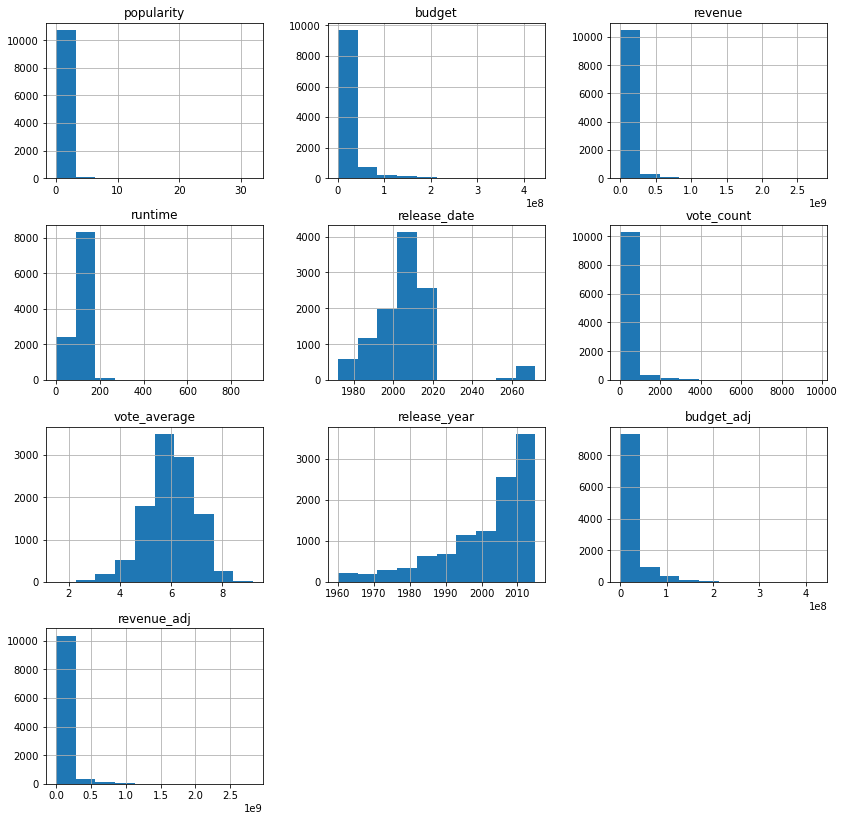

In [19]:
#distribution of data from each properties
df.hist(figsize = (14, 14));

In [20]:
import matplotlib.pyplot as plt

### Research Question 1: Which year has the most number of movies produced?

Text(0, 0.5, 'release_year_value_counts')

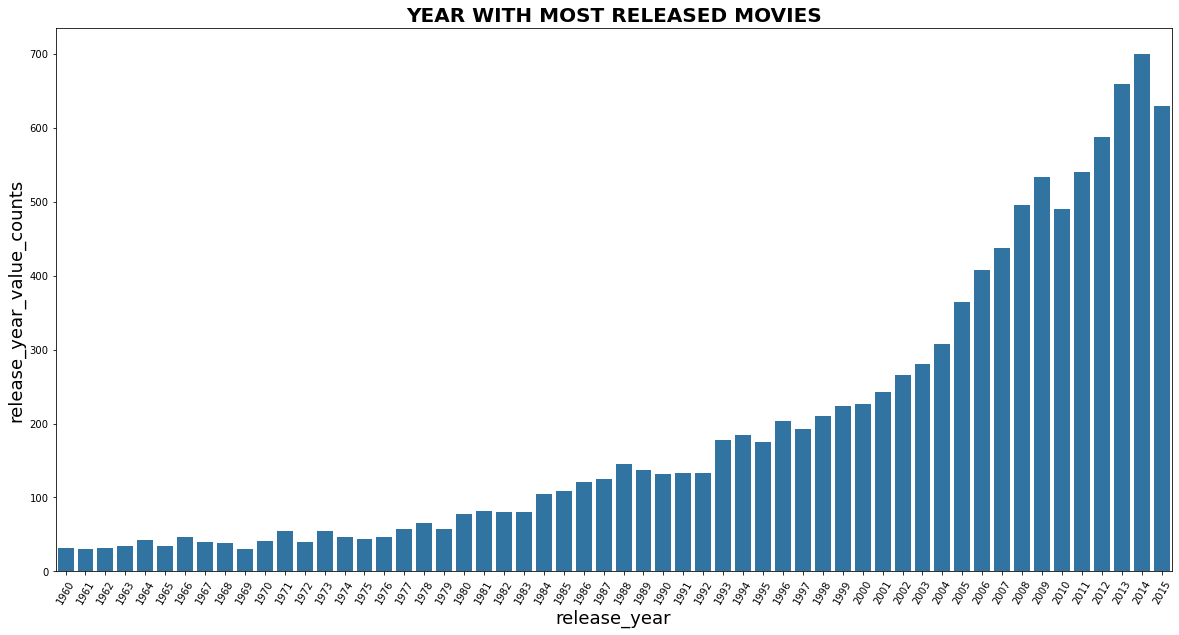

In [21]:
#creating a countplot of moive per year

plt.figure(figsize = (20,10))
color = sns.color_palette()[0]

sns.countplot(x = "release_year", data = df, color = color);

plt.title("YEAR WITH MOST RELEASED MOVIES", fontweight = "bold", fontsize = 20)
plt.xlabel("release_year", fontsize = 18)
plt.xticks(rotation=60)
plt.ylabel("release_year_value_counts", fontsize = 18)
#order = df["release_year"].value_counts.index[0:15]

from the table more movies were released in 2014 as shown in the barplot abbove

### Research Question 2: What kinds of properties are associated with movies that have high revenues?


In [22]:
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.0000,0.5091,0.6466,0.1265,0.7876,0.2004,0.0874,0.4738,0.5907
budget,0.5091,1.0000,0.7349,0.1913,0.6327,0.0810,0.1159,0.9690,0.6225
revenue,0.6466,0.7349,1.0000,0.1628,0.7912,0.1726,0.0570,0.7064,0.9191
runtime,0.1265,0.1913,0.1628,1.0000,0.1633,0.1568,-0.1172,0.2211,0.1757
vote_count,0.7876,0.6327,0.7912,0.1633,1.0000,0.2538,0.1079,0.5871,0.7079
vote_average,0.2004,0.0810,0.1726,0.1568,0.2538,1.0000,-0.1176,0.0930,0.1931
release_year,0.0874,0.1159,0.0570,-0.1172,0.1079,-0.1176,1.0000,0.0168,-0.0663
budget_adj,0.4738,0.9690,0.7064,0.2211,0.5871,0.0930,0.0168,1.0000,0.6466
revenue_adj,0.5907,0.6225,0.9191,0.1757,0.7079,0.1931,-0.0663,0.6466,1.0000


<AxesSubplot:>

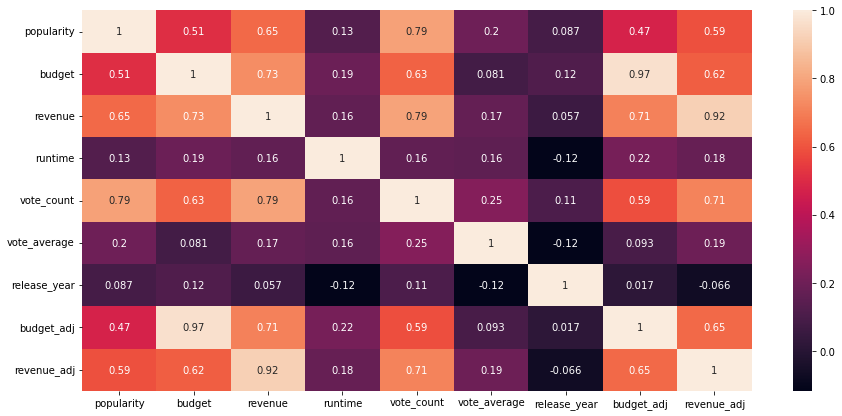

In [23]:
fig, ax = plt.subplots(figsize=(15,7))

sns.heatmap(df.corr(method = "pearson"), annot = True)

popularity, vote_count, budget, release_year, budget_adj and revenue_adj
meaning the more the budget the more the revenue

## Research Question 3: what are the 10 most voted movies

In [24]:
#Make a new dataframe by sorting it in descending order of vote_count.

max_vote_count = df.sort_values(["vote_count"], ascending = False)

In [25]:
def barplot(x,y):
    fig,ax=plt.subplots(figsize=(15,10))

    color = sns.color_palette()[0]
    g = sns.barplot(x, y, color = color);

    plt.xticks(rotation = 90)

    return g

    plt.show();
    

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


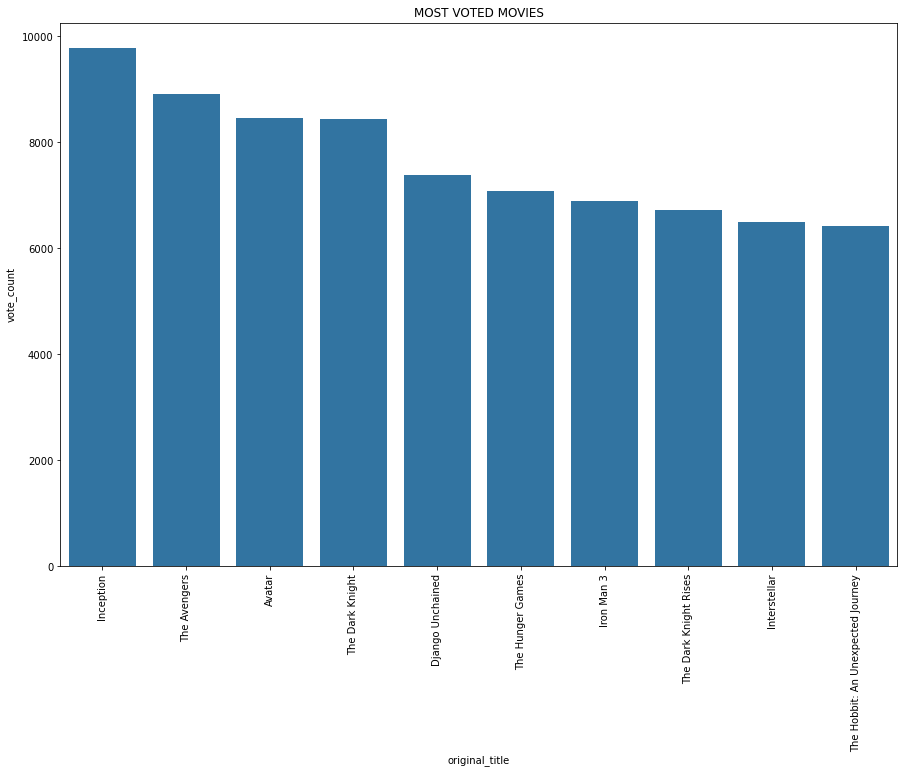

In [26]:
barplot(max_vote_count["original_title"][:10],max_vote_count["vote_count"][:10]).set(title = "MOST VOTED MOVIES");

inception is the most voted movie with vote_count of over 9000

## Research Question 4: most voted directors

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'MOST POPULAR DIRECTORS')]

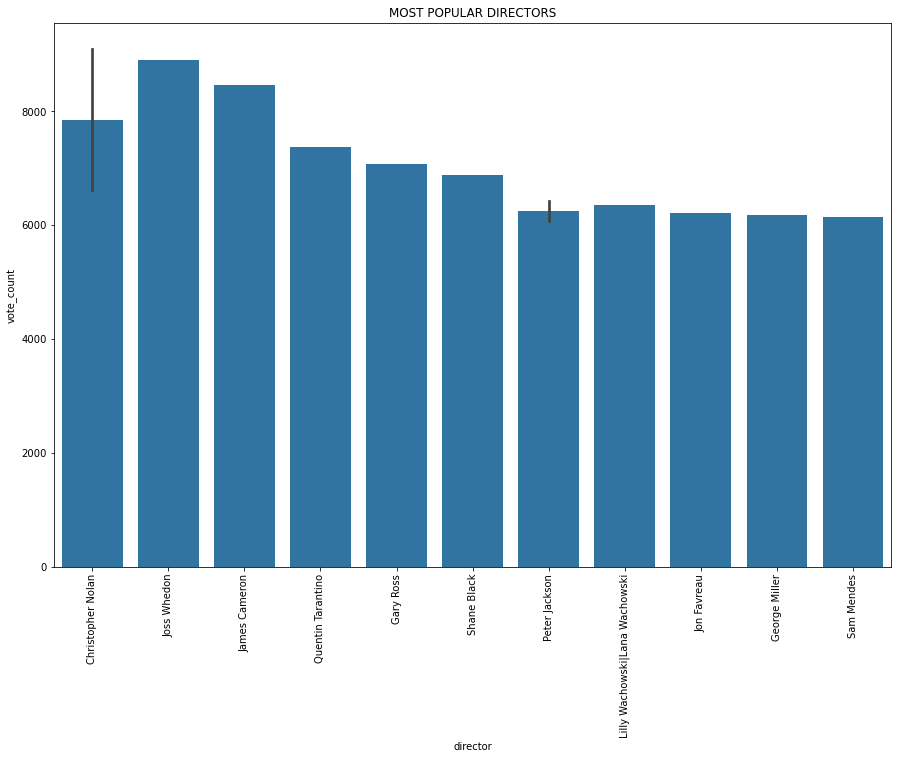

In [27]:
barplot(max_vote_count["director"][:15],max_vote_count["vote_count"][:15]).set(title = "MOST POPULAR DIRECTORS")

Christopher Nolan has the higest vote of over 10000, followed by Joss Whedon and James cameron .... as shown on the bar chat above

## Research Question 5: 12 most popular movies

In [28]:
#Make a new dataframe by sorting it in descending order of popularity.

most_popular = df.sort_values(["popularity"], ascending = False)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'MOST POPULAR MOVIES')]

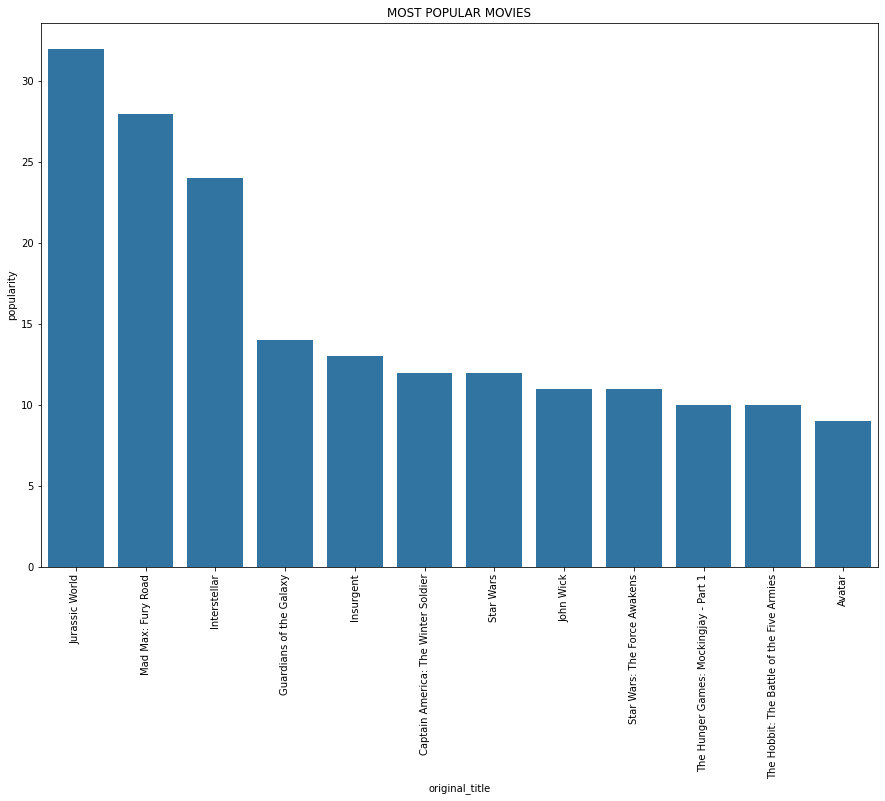

In [29]:
barplot(most_popular["original_title"][:12], most_popular["popularity"][:12]).set(title = "MOST POPULAR MOVIES")

as we can see from our data, Jurassic world is the most popular movie as plotted 

## Research Question 6: what is the relationship between budget and revenue generated?

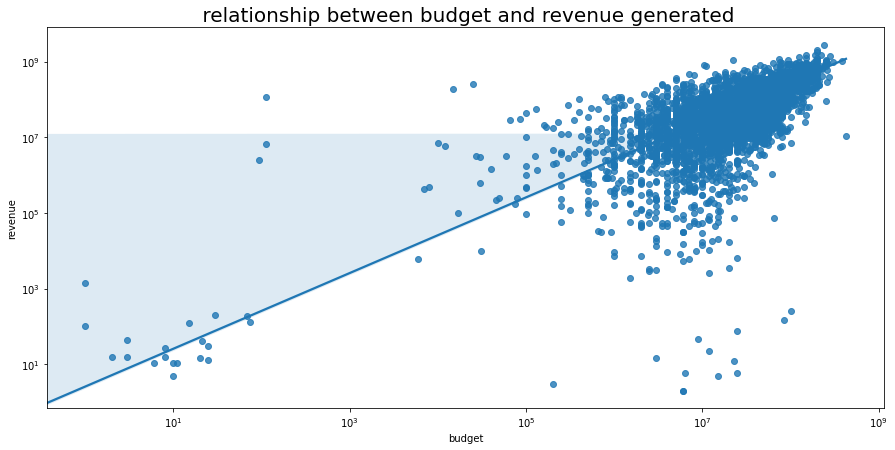

In [30]:
fig,ax=plt.subplots(figsize=(15,7))

sns.regplot(x = "budget", y = "revenue", data = df)

plt.title(" relationship between budget and revenue generated", fontsize = 20)
plt.xscale('log')
plt.yscale('log')

since the two axis revenue and budget have a long tail, i performed a log transform of both. and the visualization shows that as more budget is allocated, more revenue is made.

# Conclusions
while exploring and analysing the TMDB movie data, I loaded the data using pandas, there were missing values, wrong data types and two(2) columns I dropped(id, tmdb_id) since i didn't see the need of those columns for my analysis

From my exploration using heatmap; popularity, vote_count, budget, release_year, budget_adj and revenue_adj were correlated to revenue. meaning the more the budget, popularity and vote_count the more the revenue generated

I discovered using barplot, that the most voted movie is different from the most most popular movies
meaning because the movie has a higher vote_count doesn't mean it is popular, and because a movie is popular doesn't mean it vote_count is high

Also With my scatterplot, you can see that the more the budget, the more revenue generated.

## limitations
there were some limitations in the dataset as some of the datatypes of features had to be converted to the appropriate types to be able to perform analysis on.
i couldn't identify a genre a movie falls into, as one movie had two or more genres associated with them.
